Imports and Initializations

In [132]:
!cd
!C:\EnergyPlusV9-6-0\EnergyPlus -v
!C:\EnergyPlusV9-6-0\EnergyPlus -h
import os
import opyplus as op
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import pandas as pd
eplus_dir_path = op.get_eplus_base_dir_path((9, 6, 0))
# print("Baseline Filepath:")
# filepath1 = input()
# print("Optimized Filepath:")
# filepath2 = input()
idf_path = "C:\\Users\\chmat\\Documents\\GenOpt\\1\\backup\\REFBLDG1.expidf"
idf_path2 = "C:\\Users\\chmat\\Documents\\GenOpt\\1\\output\\output.expidf"
idf_path3 = "C:\\Users\\chmat\\Documents\\GenOpt\\1\\test\\test.expidf"
epw_path = os.path.join("-w",
    eplus_dir_path,
    "WeatherData",
    "USA_CO_Denver-Aurora-Buckley.AFB.724695_TMY3.epw")

PricePerKwh = pd.read_excel (r'C:\\Users\\chmat\\Desktop\\THESIS\\Optimization Files\\TimeofDayPricing - Copy.xlsx')

C:\Users\chmat\Desktop\THESIS
EnergyPlus, Version 9.6.0-f420c06a69, YMD=2022.04.08 10:54
EnergyPlus, Version 9.6.0-f420c06a69, YMD=2022.04.08 10:54
PythonLinkage: Linked to Python Version: "3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]"
Built on Platform: Windows_x86_64
Usage: energyplus [options] [input-file]
Options:
  -a, --annual                 Force annual simulation
  -c, --convert                Output IDF->epJSON or epJSON->IDF, dependent on
                               input file type
  -d, --output-directory ARG   Output directory path (default: current
                               directory)
  -D, --design-day             Force design-day-only simulation
  -h, --help                   Display help information
  -i, --idd ARG                Input data dictionary path (default: Energy+.idd
                               in executable directory)
  -j, --jobs ARG               Multi-thread with N threads; 1 thread with no
                   

BASELINE

In [133]:
# # run simulation
s = op.simulate(idf_path, epw_path, "Baseline")
print(f"status: {s.get_status()}\n")
print(f"Eplus .err file:\n{s.get_out_err().get_content()}")
# eso = s.get_out_eso()
# print(eso.get_info())

called Simulation.from_input on a simulation directory that is not empty (Baseline)


status: finished



OPTIMIZED

In [ ]:
# # run simulation
s2 = op.simulate(idf_path2, epw_path, "Optimized")
print(f"status: {s2.get_status()}\n")
print(f"Eplus .err file:\n{s2.get_out_err().get_content()}")

TEST

In [137]:
# # # run simulation
# s3 = op.simulate(idf_path3, epw_path, "Test")
# print(f"status: {s3.get_status()}\n")
# print(f"Eplus .err file:\n{s3.get_out_err().get_content()}")

PULL DATA

In [164]:
df = pd.read_csv('C:\\Users\\chmat\\Documents\\GenOpt\\1\\backup\\REFBLDG1.csv')
df2 = pd.read_csv('C:\\Users\\chmat\\Documents\\GenOpt\\1\\output\\output.csv')
#df3 = pd.read_csv('C:\\Users\\chmat\\Documents\\GenOpt\\1\\test\\REFBLDG1.csv')

In [165]:
df = df[48:72]
df2 = df2[48:72]
#df3 = df3[48:72]

In [166]:
df2.keys()

Index(['Date/Time',
       'Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)',
       'LIVING_UNIT1:Zone Mean Air Temperature [C](Hourly)',
       'ATTIC_UNIT1:Zone Mean Air Temperature [C](Hourly)',
       'LIVING_UNIT1:Zone Air Temperature [C](Hourly)',
       'LIVING_UNIT1:Zone Thermostat Heating Setpoint Temperature [C](Hourly)',
       'ATTIC_UNIT1:Zone Air Temperature [C](Hourly)',
       'ATTIC_UNIT1:Zone Thermostat Heating Setpoint Temperature [C](Hourly)',
       'Heating:Electricity [J](Hourly) '],
      dtype='object')

In [167]:
ZoneT = df[["LIVING_UNIT1:Zone Mean Air Temperature [C](Hourly)"]]
OutsideT = df["Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"]
Heating = df["General:Heating:Electricity [J](Hourly) "]
Setpoint = df["LIVING_UNIT1:Zone Thermostat Heating Setpoint Temperature [C](Hourly)"]

ZoneT2 = df2[["LIVING_UNIT1:Zone Mean Air Temperature [C](Hourly)"]]
OutsideT2 = df2["Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"]
Heating2 = df2["Heating:Electricity [J](Hourly) "]
Setpoint2 = df2["LIVING_UNIT1:Zone Thermostat Heating Setpoint Temperature [C](Hourly)"]

# ZoneT3 = df3[["LIVING_UNIT1:Zone Mean Air Temperature [C](Hourly)"]]
# OutsideT3 = df3["Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"]
# Heating3 = df3["General:Heating:Electricity [J](Hourly) "]
# Setpoint3 = df3["LIVING_UNIT1:Zone Thermostat Heating Setpoint Temperature [C](Hourly)"]


In [168]:
Heating

48    1.484245e+07
49    1.253520e+07
50    1.290767e+07
51    1.251578e+07
52    1.250329e+07
53    1.193156e+07
54    1.331642e+07
55    1.421791e+07
56    9.121921e+06
57    6.560330e+06
58    5.883402e+06
59    6.521893e+06
60    4.939703e+06
61    4.886129e+06
62    9.144205e+06
63    8.195346e+06
64    6.388103e+06
65    8.983909e+06
66    1.216807e+07
67    1.330557e+07
68    1.325031e+07
69    1.527999e+07
70    1.922212e+07
71    1.859294e+07
Name: General:Heating:Electricity [J](Hourly) , dtype: float64

In [169]:
hours =24

In [171]:
print( 'BASELINE: ' + str(sum (Heating[0:hours]/1000000000)) + ' GJ')
#print( str(sum (Heating[0:hours]/3.6e6)) + 'kWh')
print( 'OPTIMIZE: ' + str(sum (Heating2[0:hours]/1000000000)) + ' GJ')
#print( 'TEST: ' + str(sum (Heating3[0:hours]/1000000000)) + ' GJ')

BASELINE: 0.26721421115285565 GJ
OPTIMIZE: 0.18520935767121702 GJ


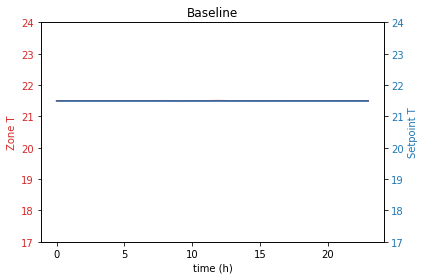

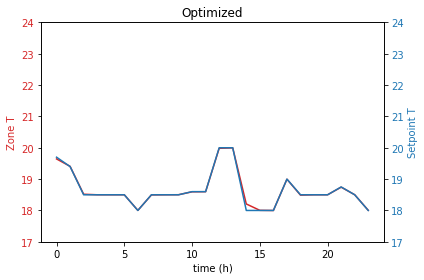

In [177]:
## Baseline
t = np.arange(0, hours, 1)
data1 = ZoneT[0:hours]
data2 = Setpoint[0:hours]

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature Setpoint & Actual"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Zone T', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([17, 24])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Setpoint T', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([17, 24])
plt.title('Baseline')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Optimized
t = np.arange(0, hours, 1)
data1 = ZoneT2[0:hours]
data2 = Setpoint2[0:hours]

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature Setpoint & Actual"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Zone T', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([17, 24])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Setpoint T', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([17, 24])
plt.title('Optimized')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Test
t = np.arange(0, hours, 1)
data1 = ZoneT2[0:hours]
data2 = Setpoint2[0:hours]

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature Setpoint & Actual"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Zone T', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([17, 24])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Setpoint T', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([17, 24])
plt.title('Optimized')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



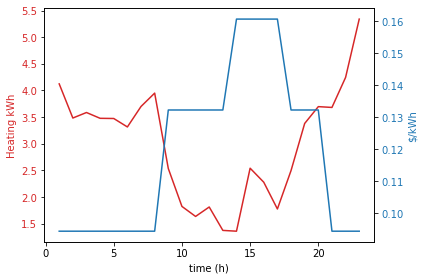

In [84]:
# Create some mock data
t = np.arange(1, hours, 1)
data1 = Heating[0:hours-1]/3.6E6 ##J to kWh
data2 = PricePerKwh[0:hours-1]*3.4E6

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature and Prices"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Heating kWh', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('$/kWh', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [85]:
Heating[0:hours]


48    1.484245e+07
49    1.253520e+07
50    1.290767e+07
51    1.251578e+07
52    1.250329e+07
53    1.193156e+07
54    1.331642e+07
55    1.421791e+07
56    9.121921e+06
57    6.560330e+06
58    5.883402e+06
59    6.521893e+06
60    4.939703e+06
61    4.886129e+06
62    9.144205e+06
63    8.195346e+06
64    6.388103e+06
65    8.983909e+06
66    1.216807e+07
67    1.330557e+07
68    1.325031e+07
69    1.527999e+07
70    1.922212e+07
71    1.859294e+07
Name: General:Heating:Electricity [J](Hourly) , dtype: float64

In [87]:
### Total Price for Time Period
TotPrice = np.vdot(PricePerKwh[0:hours], Heating[0:hours])+5.60/31
print(TotPrice)

8.622318226021264


In [88]:
# # Create some mock data
# t = np.arange(0, hours, 1)
# data1 = Heating[0:hours]/3.6e6
# data2 = PricePerKwh[0:hours]

# fig, ax1 = plt.subplots()

# color = 'tab:red'
# title = "Temperature and Prices"
# ax1.set_xlabel('time (h)')
# ax1.set_ylabel('Heating kWh', color=color)
# ax1.plot(t, data1, color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('$/kWh', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

In [40]:
idf_path2 = 'C:\\Users\\chmat\\Documents\\GenOpt\\1\\output\\output.expidf'
epw_path2 = os.path.join("-w",
    eplus_dir_path,
    "WeatherData",
    "USA_CO_Denver-Aurora-Buckley.AFB.724695_TMY3.epw")


In [41]:
print(idf_path2)

C:\Users\chmat\Documents\GenOpt\1\output\output.expidf


In [112]:
# # run simulation
s2 = op.simulate(idf_path2, epw_path2, "Optimized")
print(f"status: {s.get_status()}\n")
print(f"Eplus .err file:\n{s.get_out_err().get_content()}")

called Simulation.from_input on a simulation directory that is not empty (Optimized)


status: finished

Eplus .err file:
Program Version,EnergyPlus, Version 9.6.0-f420c06a69, YMD=2022.04.07 14:37,
   ** Warning ** Output:PreprocessorMessage="GroundTempCalc - Slab" has the following Warning condition:
   **   ~~~   ** Slab thickness [0.100 m] reset to 0.122 m  for computational stability.
   ************* Beginning Zone Sizing Calculations
   ** Warning ** CalculateZoneVolume: 1 zone is not fully enclosed. For more details use:  Output:Diagnostics,DisplayExtrawarnings; 
   ** Warning ** CheckUsedConstructions: There are 13 nominally unused constructions in input.
   **   ~~~   ** For explicit details on each unused construction, use Output:Diagnostics,DisplayExtraWarnings;
   ** Warning ** GetAirflowNetworkInput: AirflowNetwork:SimulationControl object, 
   **   ~~~   ** ..Specified AirflowNetwork Control = "MultizoneWithDistribution" and ZoneVentilation:* objects are present.
   **   ~~~   ** ..ZoneVentilation objects will not be simulated.
   ************* Beginning Sy

In [113]:
opt_df = pd.read_csv('C:\\Users\\chmat\\Documents\\GenOpt\\1\\output\\output.csv')
opt_df[48:72]
#opt_df.keys()

,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),LIVING_UNIT1:Zone Mean Air Temperature [C](Hourly),ATTIC_UNIT1:Zone Mean Air Temperature [C](Hourly),LIVING_UNIT1:Zone Air Temperature [C](Hourly),LIVING_UNIT1:Zone Thermostat Heating Setpoint Temperature [C](Hourly),ATTIC_UNIT1:Zone Air Temperature [C](Hourly),ATTIC_UNIT1:Zone Thermostat Heating Setpoint Temperature [C](Hourly),Heating:Electricity [J](Hourly)
48,01/01 01:00:00,-4.666667,19.644313,-2.360221,19.644313,19.70,-2.360221,0.0,1.631484e+07
49,01/01 02:00:00,-3.000000,19.407451,-0.451383,19.407451,19.40,-0.451383,0.0,1.006297e+07
50,01/01 03:00:00,-3.583333,18.517892,-0.903570,18.517892,18.50,-0.903570,0.0,6.907064e+06
51,01/01 04:00:00,-2.833333,18.500346,-0.492963,18.500346,18.50,-0.492963,0.0,7.594447e+06
52,01/01 05:00:00,-2.000000,18.500237,-0.249949,18.500237,18.50,-0.249949,0.0,7.875685e+06
53,01/01 06:00:00,-1.416667,18.500211,0.905201,18.500211,18.50,0.905201,0.0,7.516552e+06
54,01/01 07:00:00,-1.000000,18.002244,1.239194,18.002244,18.00,1.239194,0.0,7.672643e+06
55,01/01 08:00:00,-1.000000,18.495718,1.164350,18.495718,18.50,1.164350,0.0,1.021037e+07
56,01/01 09:00:00,-0.416667,18.500016,2.412507,18.500016,18.50,2.412507,0.0,6.270686e+06
57,01/01 10:00:00,1.166667,18.501964,3.320411,18.501964,18.50,3.320411,0.0,4.521347e+06


In [114]:
ZoneT2 = opt_df[["LIVING_UNIT1:Zone Mean Air Temperature [C](Hourly)"]]
OutsideT2 = opt_df["Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"]
Heating2 = opt_df["Heating:Electricity [J](Hourly) "][48:72]
Setpoint2 = opt_df["LIVING_UNIT1:Zone Thermostat Heating Setpoint Temperature [C](Hourly)"]
#Notmet = sum (df["living_unit1,Zone Heating Setpoint Not Met While Occupied Time"])
#PeopleE= df['living_unit1,Zone People Total Heating Energy']
# monthly resample and display
# print(df[[
#     "living_unit1,Zone Mean Air Temperature",
# ]])
print(Heating)

48    1.623497e+07
49    1.001451e+07
50    6.875631e+06
51    7.566954e+06
52    7.854073e+06
53    7.499698e+06
54    7.661720e+06
55    1.019925e+07
56    6.261655e+06
57    4.518071e+06
58    3.829304e+06
59    4.849901e+06
60    3.691578e+06
61    3.203965e+06
62    6.392093e+06
63    8.762676e+06
64    6.231487e+06
65    4.850577e+06
66    5.761203e+06
67    9.081010e+06
68    9.413741e+06
69    9.871161e+06
70    1.206212e+07
Name: Heating:Electricity [J](Hourly) , dtype: float64


In [115]:
print( str(sum (Heating[0:hours]/1000000000)) + 'GJ')
print( str(sum (Heating[0:hours]/3.6e6)) + 'kWh')

0.1726873582413589GJ
47.9687106225997kWh


In [116]:
np.shape(Heating2)

(24,)

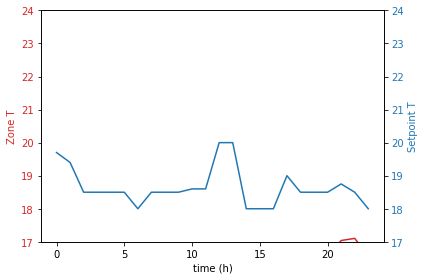

In [117]:
# Create som mock data
hours = 24
t = np.arange(0, hours, 1)
data1 = ZoneT2[0:hours]
data2 = Setpoint2[0:hours]

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature Setpoint & Actual"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Zone T', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([17, 24])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Setpoint T', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([17, 24])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


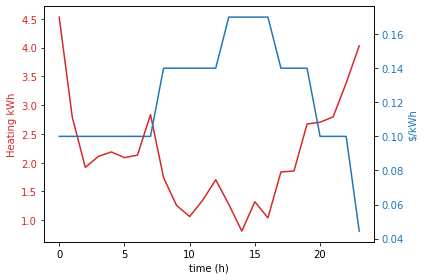

In [119]:
# Create some mock data
t = np.arange(0, hours, 1)
data1 = Heating2[0:hours]/3.6e6
data2 = PricePerKwh[0:hours]*3.6E6

fig, ax1 = plt.subplots()

color = 'tab:red'
title = "Temperature and Prices"
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Heating kWh', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$/kWh', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [123]:
### Total Price for Time Period
TotPrice2 = np.vdot(PricePerKwh[0:hours], Heating2[0:hours])+5.60/31
print(TotPrice2)

5.951924716026955


In [122]:
#TotPrice2 = np.vdot(PricePerKwh[1:hours], Heating2[1:hours]/3.6e6)
print("MINIMUM PRICE $ " + str(TotPrice2))
print("BASELINE PRICE $ " + str(TotPrice))


MINIMUM PRICE $ 5.951924716026955
BASELINE PRICE $ 8.622318226021264


In [124]:
#Energy Comparison
print (sum(Heating[0:hours])/3.6e6)
print (sum(Heating2[0:hours])/3.6e6)

47.96871062259969
51.447043797560276


# RATING ANOTHER SCHEDULE

In [151]:
#Schedule Rating
MaxP = TotPrice
MinP = TotPrice2
DayPrice = 1.2
PriceRating = (1-(DayPrice-MinP)/(MaxP-MinP))*5
if (PriceRating > 5):
    PriceRating=5
    
print(PriceRating)

##Comfort Rating
## Preffered point not met while occupied 
PrefT = 21
count =0

for i in range (23):
    T = ZoneT2['living_unit1,Zone Mean Air Temperature'][i]
    if (i <7 or i>17):
        if ((T-PrefT)> 1.25):
            count = count+1
print(count)  

TRating = (1-(count/24))*5
if (TRating > 5):
    TRating=5
    
print(TRating)

4.642317879508776
0
5.0


In [153]:
Rating = 0.5*PriceRating + 0.5*TRating
print('RATING:' +str(Rating))

RATING:4.821158939754389


TEST BELOW

Add Constraints

In [ ]:
# s = op.simulate(idf_path, epw_path, "Baseline")
# print(f"status: {s.get_status()}\n")
# print(f"Eplus .err file:\n{s.get_out_err().get_content()}")

ZoneT = df[["living_unit1,Zone Mean Air Temperature"]][1:hours]
Heating = df["heating:electricity,Meter"][1:hours]
print(ZoneT['living_unit1,Zone Mean Air Temperature'][9])

In [ ]:
model.addConstrs((ZoneT['living_unit1,Zone Mean Air Temperature'][i] <= 24.0 for i in range(hours)), name='T_max')
model.addConstrs((ZoneT['living_unit1,Zone Mean Air Temperature'][i] >= 18.0 for i in range(hours)), name='T_min')

##Maybe the setpoint can be higher... as long as the actual temperature is within comfort

In [ ]:

Cost = PricePerKwh.values.flatten()
a = Cost[0:hours]
A = sp.diags(a)

In [ ]:


# Solve
model.optimize()
printSolution()


In [ ]:
 # plotting the points
Opt_T = model.printAttr('T_Setpoints')
t = np.arange(1, hours, 1)
print(Opt_T[1])
# plt.plot(t,t)

In [ ]:
##Convert J to kWh
Heating = Heating / 3.6E6

In [ ]:
# Create some mock data
t = np.arange(1, 24*30, 1)
data1 = Heating[1:24*30]
data2 = ZoneT[1:24*30]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (h)')
ax1.set_ylabel('Heating Elec (Kwh)', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('ZoneT', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [ ]:
## Just January to Test ####
## Elec Heating
plt.plot(ZoneT[1:24*60])
# naming the x axis
plt.xlabel('Date')
# naming the y axis
plt.ylabel('Heating Electricity (kWh)')
 
# giving a title to my graph
plt.title('Zone Temperature')